<a href="https://colab.research.google.com/github/RicardoR002/NLP-CAI2300C/blob/main/Bean_MCNN_RR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification Neural Network

Ricardo Ruano CAI2300C

The goal of this multiclass classification neural network model is to predict and classify 7 different types of dry beans based on their physical characteristics / features. Using a dataset samples with 16 features describing their shape and size properties, the model aims to distinguish between DERMASON, SIRA, SEKER, HOROZ, CALI, BARBUNYA, and BOMBAY bean types.

## Step 1: Load and Explore the Data.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('https://github.com/RicardoR002/Data/raw/refs/heads/main/Dry_Bean_Dataset.csv')

# Display the first few rows of the dataset
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [2]:
# Display the column names.
print(df.columns)

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


In [3]:
# Display unique values in column Class. This will be our target column, we have 7 different types of classification options.
print(df['Class'].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


## Data report before EDA / Preprocess.

In [4]:
# We found no missing values in addition to recommendations.
def data_quality_report(df):
    report = []

    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        unique_values = col_data.nunique()
        missing_values = col_data.isnull().sum()

        # Initialize problem and recommendation lists
        problems = []
        recommendations = []

        # Check for high cardinality in non-numeric columns
        if col_type == 'object' and unique_values > 50:
            problems.append("High cardinality (many unique values)")
            recommendations.append("Consider encoding with caution or reducing categories")

        # Check for missing values
        if missing_values > 0:
            problems.append(f"Missing values (count: {missing_values})")
            recommendations.append("Consider imputing missing values or removing rows")

        # For numeric columns only, check for infinities, scaling, and other issues
        if pd.api.types.is_numeric_dtype(col_data):
            # Check for infinities
            has_inf = np.isinf(col_data).sum()
            if has_inf > 0:
                problems.append(f"Infinities found (count: {has_inf})")
                recommendations.append("Consider replacing infinities with a large finite value")

            # Check if scaling is needed based on range
            col_range = col_data.max() - col_data.min()
            if col_range > 1000 or col_data.std() > 100:
                problems.append("Wide range of values")
                recommendations.append("Consider scaling (e.g., Min-Max or Standard Scaler)")

        # Check if column is non-numeric and may need encoding
        elif col_type == 'object':
            problems.append("Non-numeric column may require encoding")
            recommendations.append("Consider one-hot encoding or label encoding if needed")

        # Add column summary to report
        report.append({
            "Column": col,
            "Data Type": col_type,
            "Unique Values": unique_values,
            "Potential Problems": "; ".join(problems) if problems else "None",
            "Recommendations": "; ".join(recommendations) if recommendations else "None"
        })

    # Convert report to a DataFrame for easy viewing
    report_df = pd.DataFrame(report)
    return report_df

# Report
report_df = data_quality_report(df)
report_df

,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,Area,int64,12011,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
1,Perimeter,float64,13351,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
2,MajorAxisLength,float64,13543,None,None
3,MinorAxisLength,float64,13543,None,None
4,AspectRation,float64,13543,None,None
5,Eccentricity,float64,13543,None,None
6,ConvexArea,int64,12066,Wide range of values,"Consider scaling (e.g., Min-Max or Standard Sc..."
7,EquivDiameter,float64,12011,None,None
8,Extent,float64,13535,None,None
9,Solidity,float64,13522,None,None


In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Step 2: Preprocess the Data.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if necessary, we have none.

# Separate input features and target variable
X = df.drop(columns=['Class'])  # 'Class' is the target column
y = df['Class'].values

# Encode the target variable y (Class)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts the seven Class type into numerical.
# Check the number of features
n_features = X.shape[1]
print(f"Number of features: {n_features}")

Number of features: 16


In [7]:
# Get the original class names
original_classes = label_encoder.classes_

# Create a mapping of original labels to new numerical labels
mapping = dict(zip(original_classes, label_encoder.transform(original_classes)))

# Display the mapping
print(mapping)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


## Step 3: Split the Data into Train and Test Sets (Scale features)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer # Import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the column transformer. (MinMax scaler)
transformer = make_column_transformer(
    (MinMaxScaler(), ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']),
    remainder='passthrough'
)

# Fit and transform the training data
X_train = transformer.fit_transform(X_train)

# Transform the test data
X_test = transformer.transform(X_test)

In [9]:
# Get feature names after transformation
feature_names = transformer.get_feature_names_out()

# Convert transformed arrays back to DataFrames with appropriate feature names.
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Display the first few rows of the scaled training data.
X_train_df.head()

,minmaxscaler__Area,minmaxscaler__Perimeter,minmaxscaler__MajorAxisLength,minmaxscaler__MinorAxisLength,minmaxscaler__AspectRation,minmaxscaler__Eccentricity,minmaxscaler__ConvexArea,minmaxscaler__EquivDiameter,minmaxscaler__Extent,minmaxscaler__Solidity,minmaxscaler__roundness,minmaxscaler__Compactness,minmaxscaler__ShapeFactor1,minmaxscaler__ShapeFactor2,minmaxscaler__ShapeFactor3,minmaxscaler__ShapeFactor4
0,0.036960,0.076417,0.092678,0.105189,0.339109,0.756397,0.036302,0.076358,0.444575,0.884449,0.828166,0.506453,0.691550,0.539603,0.454103,0.939497
1,0.075454,0.157774,0.157542,0.169519,0.354218,0.768354,0.074335,0.144515,0.485727,0.856549,0.701775,0.488505,0.565422,0.434233,0.436174,0.914787
2,0.045043,0.086805,0.083858,0.146264,0.230236,0.647130,0.043838,0.091462,0.573771,0.922827,0.857266,0.635719,0.606539,0.636833,0.587218,0.939503
3,0.060501,0.110013,0.124987,0.154276,0.310914,0.732300,0.058872,0.119113,0.736671,0.927999,0.874100,0.538417,0.591215,0.506413,0.486368,0.945857
4,0.066329,0.126902,0.122573,0.176206,0.262295,0.684299,0.064705,0.129160,0.769586,0.915324,0.815611,0.598993,0.550166,0.545132,0.548687,0.993421


## Build the Neural Network Model.

## Data Quality Report After.

In [10]:
# Run a data quality report. looks good we fixed the recommendations from before.
report_df = data_quality_report(X_train_df)
report_df

,Column,Data Type,Unique Values,Potential Problems,Recommendations
0,minmaxscaler__Area,float64,9853,None,None
1,minmaxscaler__Perimeter,float64,10730,None,None
2,minmaxscaler__MajorAxisLength,float64,10849,None,None
3,minmaxscaler__MinorAxisLength,float64,10849,None,None
4,minmaxscaler__AspectRation,float64,10849,None,None
5,minmaxscaler__Eccentricity,float64,10849,None,None
6,minmaxscaler__ConvexArea,float64,9891,None,None
7,minmaxscaler__EquivDiameter,float64,9853,None,None
8,minmaxscaler__Extent,float64,10843,None,None
9,minmaxscaler__Solidity,float64,10834,None,None


## Step 4: Define the Model for Multiclass Classification

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model - 16 input features and 7 output classications (multiclass)

model = Sequential()
model.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu', input_dim= 16))
model.add(Dense(units=16, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units=7, kernel_initializer = 'uniform', activation='softmax'))

# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Text summary of the model - shape neural network.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 663 (2.59 KB)

 Trainable params: 663 (2.59 KB)

 Non-trainable params: 0 (0.00 B)

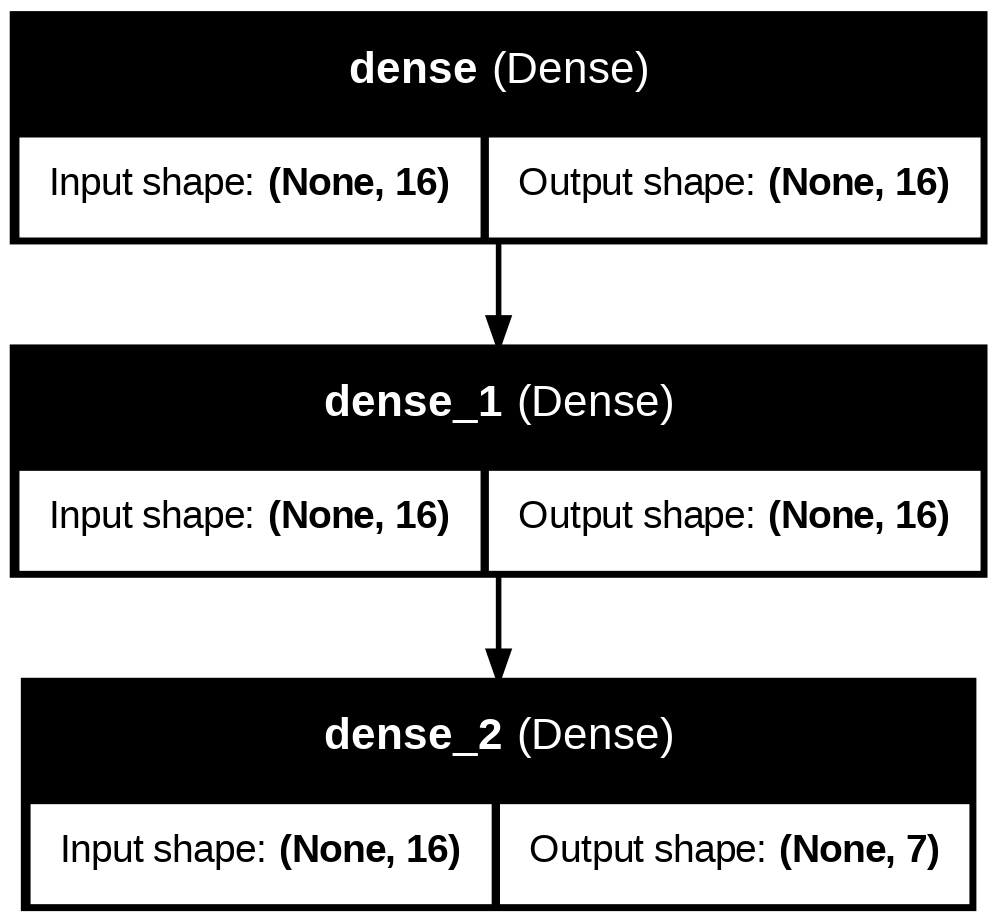

In [13]:
from tensorflow.keras.utils import plot_model

# Visual diagram of the nueral network structure.
plot_model(model, show_shapes=True, show_layer_names=True)


## Step 5: Train the Model.

In [14]:
# Train/fit the neural network model.
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2779 - loss: 1.8060
Epoch 2/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5294 - loss: 1.1602
Epoch 3/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6075 - loss: 0.9262
Epoch 4/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6958 - loss: 0.7801
Epoch 5/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.5870
Epoch 6/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.4374
Epoch 7/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8780 - loss: 0.3621
Epoch 8/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8758 - loss: 0.3512
Epoch 9/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.3297
Epoch 10/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.3153
Epoch 11/150
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.3065
Epoch 12/150
341/341 ━━━━━━━━━━━━━━━━━━━━

## Step 6: Evaluate the Model.

In [15]:
# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.2039
Test Loss: 0.2188
Test Accuracy: 91.85%


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


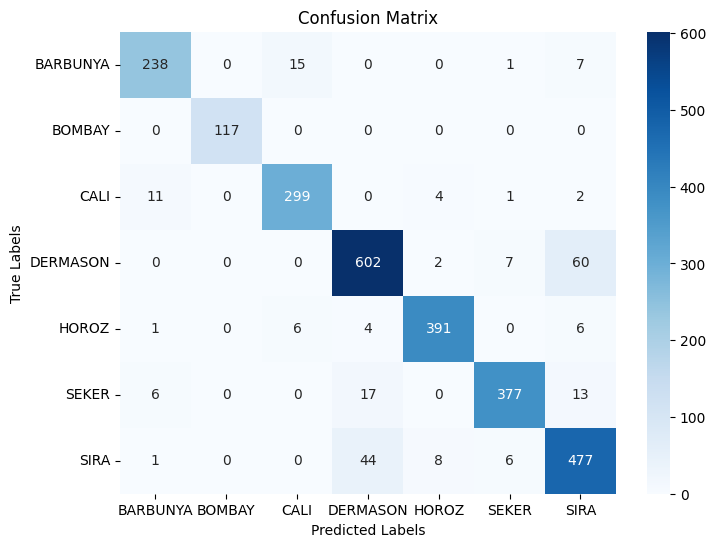

In [16]:
# Confusion matrix to show results.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Step 7: Make Predictions.

In [17]:
# Make predictions with a sample row of data into the model and predict class of bean.

# Create a sample input based on the actual features of the Bean Dataset.
sample = np.array([[
    35000,  # Area
    680,    # Perimeter
    240,    # MajorAxisLength
    190,    # MinorAxisLength
    1.26,   # AspectRation
    0.60,   # Eccentricity
    35500,  # ConvexArea
    215,    # EquivDiameter
    0.78,   # Extent
    0.99,   # Solidity
    0.95,   # roundness
    0.91,   # Compactness
    0.0066, # ShapeFactor1
    0.0027, # ShapeFactor2
    0.82,   # ShapeFactor3
    0.999   # ShapeFactor4
]])

# Make prediction
prediction = model.predict(sample)

# Convert the prediction probabilities into a class label
predicted_class = np.argmax(prediction, axis=1)

# Get the class name
class_names = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
predicted_bean_type = class_names[predicted_class[0]]

print('Predicted bean type:', predicted_bean_type)
print('Prediction probabilities:', prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted bean type: BOMBAY
Prediction probabilities: [0. 1. 0. 0. 0. 0. 0.]
